# Overview
1. Input data is the enriched CVSS score with the Exploit Code Maturity/Exploitability (E) Temporal Metric cvss-bt.csv from https://github.com/t0sche/cvss-bt
2. Percentile for a set of CVEs
3. EPSS vs CVSS color-coded by data sources e.g. red for KEV, etc... 


In [366]:
# Need these for the logic
import pandas as pd
import numpy as np
import random 

# suppress error for environment variable APPDATA missing on OSs other than Windows
import os
os.environ['APPDATA'] = ""
import pandasgui

# Need these for the plots
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.io as pio
import seaborn as sns
from IPython.display import Image #to display images in github from this notebook

EPSS_THRESHOLD_LOW = 0.1


# Get Enrichment data

In [367]:
try:
    import google.colab
    IN_COLAB = True
except:
    IN_COLAB = False

if IN_COLAB:
    # Run code specific to Google Colab environment
    print("Running in Google Colab")
    #Download the input data file
    FILE_PATH="./cvss-bt.csv"
    URL="https://raw.githubusercontent.com/t0sche/cvss-bt/main/cvss-bt.csv"

    !if [ ! -f $FILE_PATH ]; then \
        wget -O $FILE_PATH $URL; \
    else \
        echo "File already exists: $FILE_PATH"; \
    fi
    df = pd.read_csv('./cvss-bt.csv')
else:
    # Run code for other environments
    print("Not running in Google Colab")
    df = pd.read_csv('../data_in/cvss_bt/cvss-bt.csv.gz', compression="gzip")


Not running in Google Colab


/var/folders/ss/mvst4cws5c9dzhhthv64hhzr0000gq/T/ipykernel_36010/3682874487.py:19: DtypeWarning:

Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.



In [368]:
# Drop rows where 'cvss' column value is zero
df = df[df['base_score'] != 0]
df = df[df['cvss-bt_score'] != 0]


In [369]:
# Convert the column to float with coercion
df['epss'] = pd.to_numeric(df['epss'], errors='coerce')

### Add EPSS Percentile
This is also available from EPSS API

In [370]:
def percentile_rank(column):
   return column.rank(pct = True)

In [371]:
df['EPSS_Percentile'] = percentile_rank(df['epss'])
df

,cve,cvss-bt_score,cvss-bt_severity,cvss-bt_vector,cvss_version,base_score,base_severity,base_vector,assigner,published_date,epss,cisa_kev,vulncheck_kev,exploitdb,metasploit,nuclei,poc_github,EPSS_Percentile
0,CVE-1999-0095,9.0,HIGH,AV:N/AC:L/Au:N/C:C/I:C/A:C/E:POC,2.0,10.0,HIGH,AV:N/AC:L/Au:N/C:C/I:C/A:C,cve@mitre.org,1988-10-01T04:00Z,0.07764,False,False,True,False,False,False,0.940186
1,CVE-1999-0082,8.5,HIGH,AV:N/AC:L/Au:N/C:C/I:C/A:C/E:U,2.0,10.0,HIGH,AV:N/AC:L/Au:N/C:C/I:C/A:C,cve@mitre.org,1988-11-11T05:00Z,0.01500,False,False,False,False,False,False,0.865524
2,CVE-1999-1471,6.1,MEDIUM,AV:L/AC:L/Au:N/C:C/I:C/A:C/E:U,2.0,7.2,HIGH,AV:L/AC:L/Au:N/C:C/I:C/A:C,cve@mitre.org,1989-01-01T05:00Z,0.00043,False,False,False,False,False,False,0.067201
3,CVE-1999-1122,3.9,LOW,AV:L/AC:L/Au:N/C:P/I:P/A:P/E:U,2.0,4.6,MEDIUM,AV:L/AC:L/Au:N/C:P/I:P/A:P,cve@mitre.org,1989-07-26T04:00Z,0.00060,False,False,False,False,False,False,0.232693
4,CVE-1999-1467,8.5,HIGH,AV:N/AC:L/Au:N/C:C/I:C/A:C/E:U,2.0,10.0,HIGH,AV:N/AC:L/Au:N/C:C/I:C/A:C,cve@mitre.org,1989-10-26T04:00Z,0.00299,False,False,False,False,False,False,0.687800
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
240311,CVE-2023-49602,5.0,MEDIUM,CVSS:3.1/AV:N/AC:L/PR:L/UI:R/S:C/C:L/I:L/A:N/E:U,3.1,5.4,MEDIUM,CVSS:3.1/AV:N/AC:L/PR:L/UI:R/S:C/C:L/I:L/A:N,scy@openharmony.io,2024-03-04T07:15Z,0.00043,False,False,False,False,False,False,0.067201
240312,CVE-2024-21816,9.0,CRITICAL,CVSS:3.1/AV:N/AC:L/PR:N/UI:N/S:U/C:H/I:H/A:H/E:U,3.1,9.8,CRITICAL,CVSS:3.1/AV:N/AC:L/PR:N/UI:N/S:U/C:H/I:H/A:H,scy@openharmony.io,2024-03-04T07:15Z,0.00043,False,False,False,False,False,False,0.067201
240313,CVE-2024-21826,7.3,HIGH,CVSS:3.1/AV:A/AC:L/PR:L/UI:N/S:U/C:H/I:H/A:H/E:U,3.1,8.0,HIGH,CVSS:3.1/AV:A/AC:L/PR:L/UI:N/S:U/C:H/I:H/A:H,scy@openharmony.io,2024-03-04T07:15Z,0.00043,False,False,False,False,False,False,0.067201
240314,CVE-2023-46708,9.0,CRITICAL,CVSS:3.1/AV:N/AC:L/PR:N/UI:N/S:U/C:H/I:H/A:H/E:U,3.1,9.8,CRITICAL,CVSS:3.1/AV:N/AC:L/PR:N/UI:N/S:U/C:H/I:H/A:H,scy@openharmony.io,2024-03-04T07:15Z,0.00043,False,False,False,False,False,False,0.067201


# Get ACME CVE data
This can be any file of CVEs - including your CVEs.

In [372]:
# ACME data is synthesized to follow a real EPSS distribution of CVEs  
df_acme = pd.read_csv("../data_in/acme/acme_cves.csv")

df_acme

,cve
0,CVE-2020-2756
1,CVE-2019-20387
2,CVE-2019-7069
3,CVE-2018-1999006
4,CVE-2022-21434
...,...
9995,CVE-2023-4721
9996,CVE-2022-36988
9997,CVE-2018-2488
9998,CVE-2015-1420


## Enrich ACME CVEs

In [373]:
# Merge ACME CVEs with other CVE data (on the 'cve' column)
df_acme = pd.merge(df_acme, df, on='cve', how='left')
df_acme

,cve,cvss-bt_score,cvss-bt_severity,cvss-bt_vector,cvss_version,base_score,base_severity,base_vector,assigner,published_date,epss,cisa_kev,vulncheck_kev,exploitdb,metasploit,nuclei,poc_github,EPSS_Percentile
0,CVE-2020-2756,3.4,LOW,CVSS:3.1/AV:N/AC:H/PR:N/UI:N/S:U/C:N/I:N/A:L/E:U,3.1,3.7,LOW,CVSS:3.1/AV:N/AC:H/PR:N/UI:N/S:U/C:N/I:N/A:L,secalert_us@oracle.com,2020-04-15T14:15Z,0.00312,False,False,False,False,False,False,0.694562
1,CVE-2019-20387,6.9,MEDIUM,CVSS:3.1/AV:N/AC:L/PR:N/UI:N/S:U/C:N/I:N/A:H/E:U,3.1,7.5,HIGH,CVSS:3.1/AV:N/AC:L/PR:N/UI:N/S:U/C:N/I:N/A:H,cve@mitre.org,2020-01-21T23:15Z,0.00185,False,False,False,False,False,False,0.548761
2,CVE-2019-7069,8.1,HIGH,CVSS:3.0/AV:N/AC:L/PR:N/UI:R/S:U/C:H/I:H/A:H/E:U,3.0,8.8,HIGH,CVSS:3.0/AV:N/AC:L/PR:N/UI:R/S:U/C:H/I:H/A:H,psirt@adobe.com,2019-05-24T19:29Z,0.00628,False,False,False,False,False,False,0.784633
3,CVE-2018-1999006,4.0,MEDIUM,CVSS:3.0/AV:N/AC:L/PR:L/UI:N/S:U/C:L/I:N/A:N/E:U,3.0,4.3,MEDIUM,CVSS:3.0/AV:N/AC:L/PR:L/UI:N/S:U/C:L/I:N/A:N,cve@mitre.org,2018-07-23T19:29Z,0.00053,False,False,False,False,False,False,0.186396
4,CVE-2022-21434,4.9,MEDIUM,CVSS:3.1/AV:N/AC:L/PR:N/UI:N/S:U/C:N/I:L/A:N/E:U,3.1,5.3,MEDIUM,CVSS:3.1/AV:N/AC:L/PR:N/UI:N/S:U/C:N/I:L/A:N,secalert_us@oracle.com,2022-04-19T21:15Z,0.00113,False,False,False,False,False,False,0.437050
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,CVE-2023-4721,5.1,MEDIUM,CVSS:3.1/AV:L/AC:L/PR:N/UI:R/S:U/C:N/I:N/A:H/E:U,3.1,5.5,MEDIUM,CVSS:3.1/AV:L/AC:L/PR:N/UI:R/S:U/C:N/I:N/A:H,security@huntr.dev,2023-09-01T16:15Z,0.00044,False,False,False,False,False,False,0.094987
9996,CVE-2022-36988,8.1,HIGH,CVSS:3.1/AV:N/AC:L/PR:L/UI:N/S:U/C:H/I:H/A:H/E:U,3.1,8.8,HIGH,CVSS:3.1/AV:N/AC:L/PR:L/UI:N/S:U/C:H/I:H/A:H,cve@mitre.org,2022-07-28T01:15Z,0.00102,False,False,False,False,False,False,0.405272
9997,CVE-2018-2488,7.1,HIGH,CVSS:3.0/AV:L/AC:L/PR:N/UI:R/S:U/C:H/I:H/A:H/E:U,3.0,7.8,HIGH,CVSS:3.0/AV:L/AC:L/PR:N/UI:R/S:U/C:H/I:H/A:H,cna@sap.com,2018-11-13T20:29Z,0.00070,False,False,False,False,False,False,0.285187
9998,CVE-2015-1420,1.6,LOW,AV:L/AC:M/Au:N/C:P/I:N/A:N/E:U,2.0,1.9,LOW,AV:L/AC:M/Au:N/C:P/I:N/A:N,cve@mitre.org,2015-03-16T10:59Z,0.00044,False,False,False,False,False,False,0.094987


# Add Exploitability column to indicate the exploitability source 

In [374]:
def map_exploitation(row):
    if (row['cisa_kev'] | row['vulncheck_kev']):
        return 3
    elif (row['metasploit'] | row['nuclei']):
        return 2
    elif (row['exploitdb'] | row['poc_github']):
        return 1
    else:
        return 0

# Apply the function to create the 'exploitation' column
df_acme['exploitation'] = df.apply(map_exploitation, axis=1)
df_acme['exploitation'].value_counts()


0.0    6973
1.0    2853
2.0     119
3.0      19
Name: exploitation, dtype: int64

In [375]:
def plot_cve_epss_cvss (df, title="CVSS scores vs EPSS"):
    colorscale = 'YlOrRd' #Yellow Orange Red
    g=sns.jointplot(data=df, x='base_score', y='epss', kind='scatter', height=8, ratio=3, marginal_ticks=True, alpha=.7, hue="exploitation", palette=colorscale)
    handles, labels = g.ax_joint.get_legend_handles_labels()
    g.ax_joint.legend(handles=handles, labels = ['other', 'poc', 'weaponized',  'KEV'], title="Exploit Type")
    g.plot_marginals(sns.histplot, multiple="stack")
    g.fig.suptitle(title)

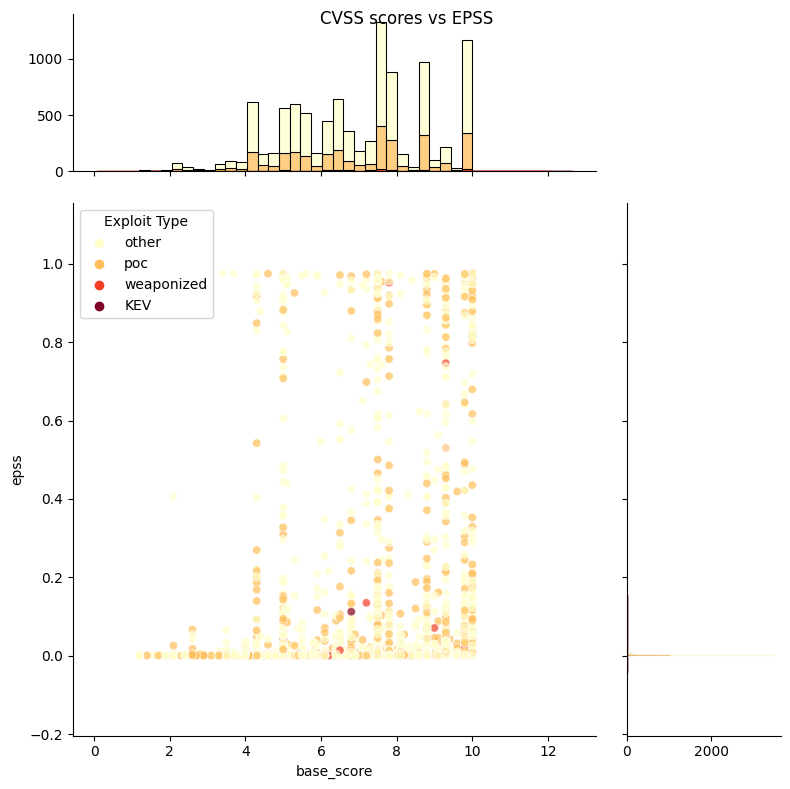

In [376]:
plot_cve_epss_cvss(df_acme)

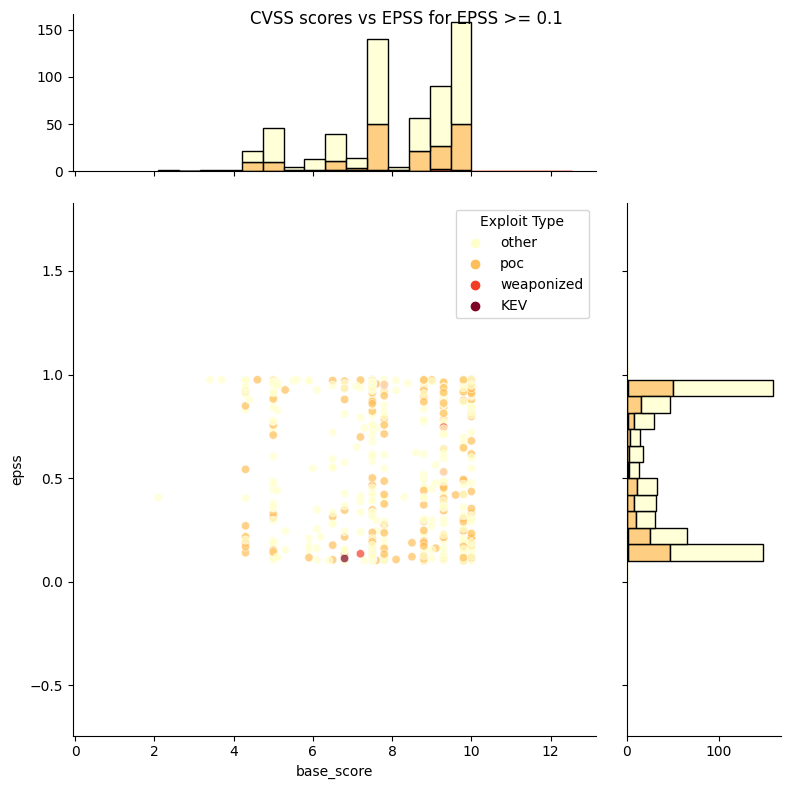

In [377]:
df_acme_epss_01 = df_acme[df_acme['epss'] >= 0.1]
plot_cve_epss_cvss(df_acme_epss_01, title="CVSS scores vs EPSS for EPSS >= 0.1")


## EPSS Curve

See https://riskbasedprioritization.github.io/epss/EPSS_Thresholds/#policy-applied-to-an-enterprise for more info on this.

In [378]:
filtered_df_acme = df_acme[~(df_acme['cisa_kev'] | df_acme['vulncheck_kev'] | df_acme['metasploit'] | df_acme['nuclei'])]
filtered_df_acme

,cve,cvss-bt_score,cvss-bt_severity,cvss-bt_vector,cvss_version,base_score,base_severity,base_vector,assigner,published_date,epss,cisa_kev,vulncheck_kev,exploitdb,metasploit,nuclei,poc_github,EPSS_Percentile,exploitation
0,CVE-2020-2756,3.4,LOW,CVSS:3.1/AV:N/AC:H/PR:N/UI:N/S:U/C:N/I:N/A:L/E:U,3.1,3.7,LOW,CVSS:3.1/AV:N/AC:H/PR:N/UI:N/S:U/C:N/I:N/A:L,secalert_us@oracle.com,2020-04-15T14:15Z,0.00312,False,False,False,False,False,False,0.694562,1.0
1,CVE-2019-20387,6.9,MEDIUM,CVSS:3.1/AV:N/AC:L/PR:N/UI:N/S:U/C:N/I:N/A:H/E:U,3.1,7.5,HIGH,CVSS:3.1/AV:N/AC:L/PR:N/UI:N/S:U/C:N/I:N/A:H,cve@mitre.org,2020-01-21T23:15Z,0.00185,False,False,False,False,False,False,0.548761,0.0
2,CVE-2019-7069,8.1,HIGH,CVSS:3.0/AV:N/AC:L/PR:N/UI:R/S:U/C:H/I:H/A:H/E:U,3.0,8.8,HIGH,CVSS:3.0/AV:N/AC:L/PR:N/UI:R/S:U/C:H/I:H/A:H,psirt@adobe.com,2019-05-24T19:29Z,0.00628,False,False,False,False,False,False,0.784633,0.0
3,CVE-2018-1999006,4.0,MEDIUM,CVSS:3.0/AV:N/AC:L/PR:L/UI:N/S:U/C:L/I:N/A:N/E:U,3.0,4.3,MEDIUM,CVSS:3.0/AV:N/AC:L/PR:L/UI:N/S:U/C:L/I:N/A:N,cve@mitre.org,2018-07-23T19:29Z,0.00053,False,False,False,False,False,False,0.186396,0.0
4,CVE-2022-21434,4.9,MEDIUM,CVSS:3.1/AV:N/AC:L/PR:N/UI:N/S:U/C:N/I:L/A:N/E:U,3.1,5.3,MEDIUM,CVSS:3.1/AV:N/AC:L/PR:N/UI:N/S:U/C:N/I:L/A:N,secalert_us@oracle.com,2022-04-19T21:15Z,0.00113,False,False,False,False,False,False,0.437050,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,CVE-2023-4721,5.1,MEDIUM,CVSS:3.1/AV:L/AC:L/PR:N/UI:R/S:U/C:N/I:N/A:H/E:U,3.1,5.5,MEDIUM,CVSS:3.1/AV:L/AC:L/PR:N/UI:R/S:U/C:N/I:N/A:H,security@huntr.dev,2023-09-01T16:15Z,0.00044,False,False,False,False,False,False,0.094987,0.0
9996,CVE-2022-36988,8.1,HIGH,CVSS:3.1/AV:N/AC:L/PR:L/UI:N/S:U/C:H/I:H/A:H/E:U,3.1,8.8,HIGH,CVSS:3.1/AV:N/AC:L/PR:L/UI:N/S:U/C:H/I:H/A:H,cve@mitre.org,2022-07-28T01:15Z,0.00102,False,False,False,False,False,False,0.405272,0.0
9997,CVE-2018-2488,7.1,HIGH,CVSS:3.0/AV:L/AC:L/PR:N/UI:R/S:U/C:H/I:H/A:H/E:U,3.0,7.8,HIGH,CVSS:3.0/AV:L/AC:L/PR:N/UI:R/S:U/C:H/I:H/A:H,cna@sap.com,2018-11-13T20:29Z,0.00070,False,False,False,False,False,False,0.285187,0.0
9998,CVE-2015-1420,1.6,LOW,AV:L/AC:M/Au:N/C:P/I:N/A:N/E:U,2.0,1.9,LOW,AV:L/AC:M/Au:N/C:P/I:N/A:N,cve@mitre.org,2015-03-16T10:59Z,0.00044,False,False,False,False,False,False,0.094987,0.0


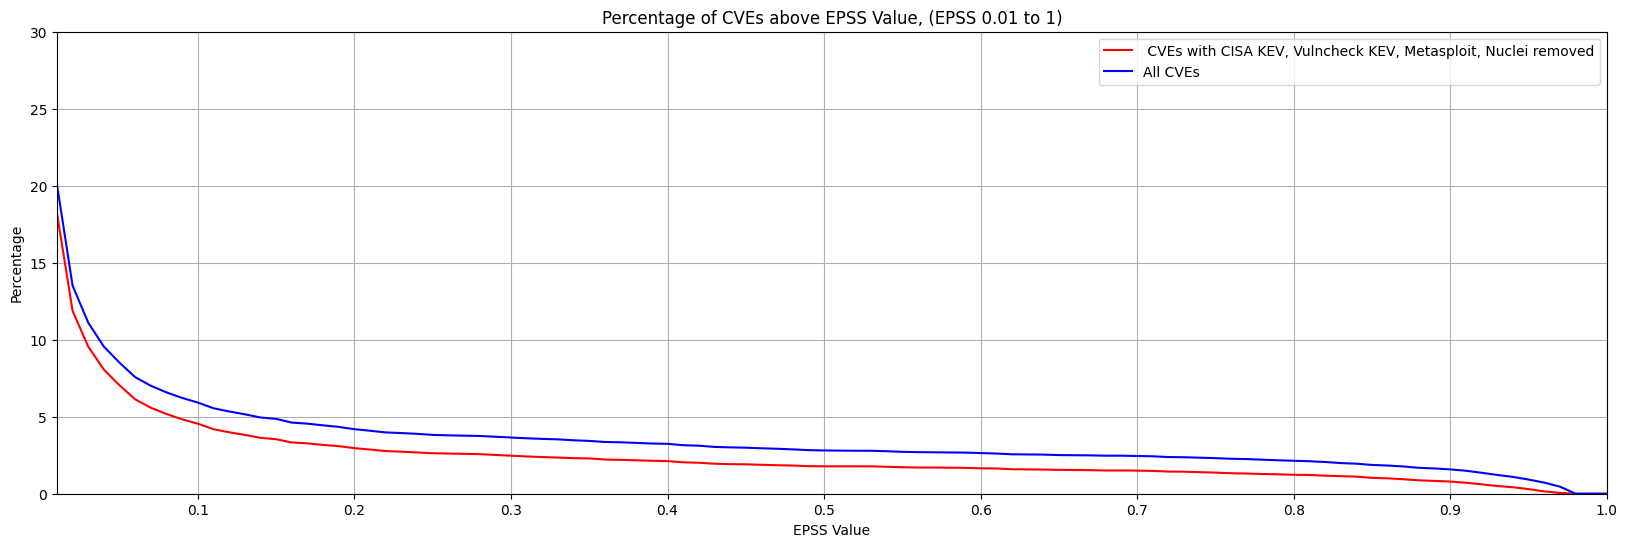

In [379]:
import numpy as np  # Import NumPy for array operations

# Define the range of values from 0 to 1
value_range = np.linspace(0, 1, 101)  # Values from 0.00 to 1.00 in steps of 0.01

# Calculate total count for normalization
total_count = len(df_acme['epss'])

# Calculate cumulative percentages for each value in the range
cumulative_percentages = [((df_acme['epss'] >= value).sum() / total_count) * 100 for value in value_range]

# Calculate cumulative percentages for filtered data
cumulative_percentages_filtered = [((filtered_df_acme['epss'] >= value).sum() / total_count) * 100 for value in value_range]

# Create a cumulative histogram
plt.figure(figsize=(20, 6))

plt.plot(value_range, cumulative_percentages_filtered, linestyle='-', color='r', label=' CVEs with CISA KEV, Vulncheck KEV, Metasploit, Nuclei removed')
plt.plot(value_range, cumulative_percentages, linestyle='-', color='b', label='All CVEs')

plt.title('Percentage of CVEs above EPSS Value, (EPSS 0.01 to 1)')
plt.xlabel('EPSS Value')
plt.ylabel('Percentage')
plt.yscale('linear')
plt.xlim(0.01, 1)
plt.ylim(0, 30)  # Adjust ylim to show percentages from 0 to 100

plt.xticks(np.arange(0.1, 1.1, 0.1))  # Set major ticks at every 0.1 step on the x-axis


plt.grid(True)
plt.legend()
plt.show()

## EPSS Percentiles

See https://riskbasedprioritization.github.io/epss/Applying_EPSS_to_your_environment/#epss-percentile-score-for-your-environment for more info on this.

In [380]:
df_acme
df_acme['ACME_EPSS_Percentile'] = percentile_rank(df_acme['epss'])
df_acme

,cve,cvss-bt_score,cvss-bt_severity,cvss-bt_vector,cvss_version,base_score,base_severity,base_vector,assigner,published_date,epss,cisa_kev,vulncheck_kev,exploitdb,metasploit,nuclei,poc_github,EPSS_Percentile,exploitation,ACME_EPSS_Percentile
0,CVE-2020-2756,3.4,LOW,CVSS:3.1/AV:N/AC:H/PR:N/UI:N/S:U/C:N/I:N/A:L/E:U,3.1,3.7,LOW,CVSS:3.1/AV:N/AC:H/PR:N/UI:N/S:U/C:N/I:N/A:L,secalert_us@oracle.com,2020-04-15T14:15Z,0.00312,False,False,False,False,False,False,0.694562,1.0,0.643715
1,CVE-2019-20387,6.9,MEDIUM,CVSS:3.1/AV:N/AC:L/PR:N/UI:N/S:U/C:N/I:N/A:H/E:U,3.1,7.5,HIGH,CVSS:3.1/AV:N/AC:L/PR:N/UI:N/S:U/C:N/I:N/A:H,cve@mitre.org,2020-01-21T23:15Z,0.00185,False,False,False,False,False,False,0.548761,0.0,0.502070
2,CVE-2019-7069,8.1,HIGH,CVSS:3.0/AV:N/AC:L/PR:N/UI:R/S:U/C:H/I:H/A:H/E:U,3.0,8.8,HIGH,CVSS:3.0/AV:N/AC:L/PR:N/UI:R/S:U/C:H/I:H/A:H,psirt@adobe.com,2019-05-24T19:29Z,0.00628,False,False,False,False,False,False,0.784633,0.0,0.742655
3,CVE-2018-1999006,4.0,MEDIUM,CVSS:3.0/AV:N/AC:L/PR:L/UI:N/S:U/C:L/I:N/A:N/E:U,3.0,4.3,MEDIUM,CVSS:3.0/AV:N/AC:L/PR:L/UI:N/S:U/C:L/I:N/A:N,cve@mitre.org,2018-07-23T19:29Z,0.00053,False,False,False,False,False,False,0.186396,0.0,0.163756
4,CVE-2022-21434,4.9,MEDIUM,CVSS:3.1/AV:N/AC:L/PR:N/UI:N/S:U/C:N/I:L/A:N/E:U,3.1,5.3,MEDIUM,CVSS:3.1/AV:N/AC:L/PR:N/UI:N/S:U/C:N/I:L/A:N,secalert_us@oracle.com,2022-04-19T21:15Z,0.00113,False,False,False,False,False,False,0.437050,0.0,0.389753
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,CVE-2023-4721,5.1,MEDIUM,CVSS:3.1/AV:L/AC:L/PR:N/UI:R/S:U/C:N/I:N/A:H/E:U,3.1,5.5,MEDIUM,CVSS:3.1/AV:L/AC:L/PR:N/UI:R/S:U/C:N/I:N/A:H,security@huntr.dev,2023-09-01T16:15Z,0.00044,False,False,False,False,False,False,0.094987,0.0,0.082686
9996,CVE-2022-36988,8.1,HIGH,CVSS:3.1/AV:N/AC:L/PR:L/UI:N/S:U/C:H/I:H/A:H/E:U,3.1,8.8,HIGH,CVSS:3.1/AV:N/AC:L/PR:L/UI:N/S:U/C:H/I:H/A:H,cve@mitre.org,2022-07-28T01:15Z,0.00102,False,False,False,False,False,False,0.405272,0.0,0.362090
9997,CVE-2018-2488,7.1,HIGH,CVSS:3.0/AV:L/AC:L/PR:N/UI:R/S:U/C:H/I:H/A:H/E:U,3.0,7.8,HIGH,CVSS:3.0/AV:L/AC:L/PR:N/UI:R/S:U/C:H/I:H/A:H,cna@sap.com,2018-11-13T20:29Z,0.00070,False,False,False,False,False,False,0.285187,0.0,0.257799
9998,CVE-2015-1420,1.6,LOW,AV:L/AC:M/Au:N/C:P/I:N/A:N/E:U,2.0,1.9,LOW,AV:L/AC:M/Au:N/C:P/I:N/A:N,cve@mitre.org,2015-03-16T10:59Z,0.00044,False,False,False,False,False,False,0.094987,0.0,0.082686


## Plot ACME EPSS Percentiles against EPSS Percentile for all CVEs

If ACME org has
- lots of CVEs with a high EPSS score then the curve will be further below the diagonal - because a CVE with high EPSS will have less CVEs below it given ACME has more higher EPSS CVEs
- a random sample of CVEs, then the curve will be on the diagonal

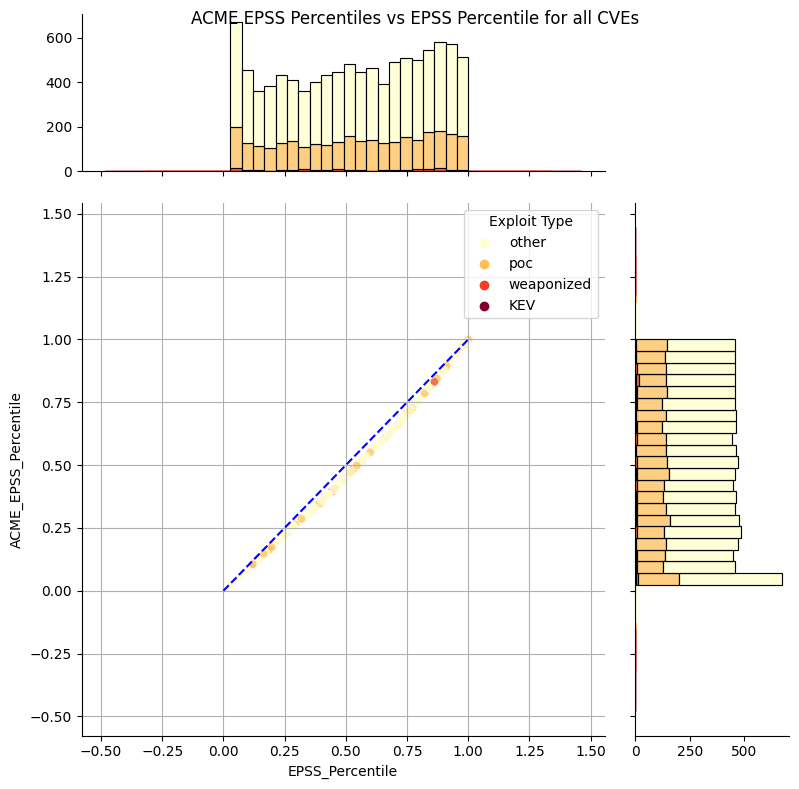

In [381]:
title= "ACME EPSS Percentiles vs EPSS Percentile for all CVEs"
colorscale = 'YlOrRd' #Yellow Orange Red
g=sns.jointplot(data=df_acme, x='EPSS_Percentile', y='ACME_EPSS_Percentile', kind='scatter', height=8, ratio=3, marginal_ticks=True, alpha=.7, hue="exploitation", palette=colorscale)
handles, labels = g.ax_joint.get_legend_handles_labels()
g.ax_joint.legend(handles=handles, labels = ['other', 'poc', 'weaponized',  'KEV'], title="Exploit Type")
g.plot_marginals(sns.histplot, multiple="stack")
g.fig.suptitle(title)
# Plot diagonal line
g.ax_joint.plot([0, 1], [0, 1], color='blue', linestyle='--')  # Diagonal line from (0,0) to (1,1)
plt.grid(True)
plt.show()

### Sanity check EPSS for All CVEs against today's EPSS percentile values
use first entries in df

In [382]:
# 0.940186
!curl 'https://api.first.org/data/v1/epss?cve=CVE-1999-0095' | jq -r '.data[].percentile'


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   202  100   202    0     0    677      0 --:--:-- --:--:-- --:--:--   680
0.940170000


In [383]:
# 0.865524
!curl 'https://api.first.org/data/v1/epss?cve=CVE-1999-0082' | jq -r '.data[].percentile'


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   202  100   202    0     0    506      0 --:--:-- --:--:-- --:--:--   507
0.866030000
